In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/fraud_small_imbalanced.csv')
df.head()

,cc_num,amt,gender,category,is_fraud
0,2.291160e+15,2.86,M,personal_care,0.0
1,3.573030e+15,29.84,F,personal_care,0.0
2,3.598220e+15,41.28,F,health_fitness,0.0
3,3.591920e+15,60.05,M,misc_pos,0.0
4,3.526830e+15,3.19,M,travel,0.0


In [2]:
df['is_fraud'].value_counts() / len(df)

,count
is_fraud,
0.0,0.995951
1.0,0.004042


In [3]:
## drop missing
df.dropna(inplace=True)

In [5]:
## drop cc_num
df.drop('cc_num', axis=1, inplace=True)

In [6]:
## dummy encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,amt,is_fraud,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,0.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
1,29.84,0.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,41.28,0.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,60.05,0.0,True,False,False,False,False,False,False,False,False,True,False,False,False,False
4,3.19,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [7]:
## Create X and y
X = df.drop('is_fraud', axis = 1)
y = df['is_fraud']

In [8]:
## split into 80% training and 20% test (random_state = 13)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Modeling

In [9]:
## FIT A LOGISTIC REGRESSION
## max_iter
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression(max_iter = 500)

## fit
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [10]:
## y_pred
## predictions
y_pred = lr.predict(X_test)

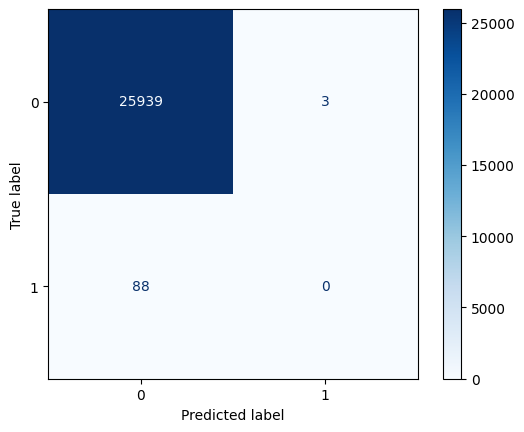

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

In [12]:
from sklearn.metrics import accuracy_score

## accuracy score
## DOES NOT WORK WELL WITH IMBALANCED DATA
accuracy_score(y_test, y_pred)

0.9965040338071456

In [14]:
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Specificity: {specificity_score(y_test, y_pred)}")

print('----------------------------------------------------------------------')
print(f"True Positive Rate: {recall_score(y_test, y_pred)}")
print(f"False Positive Rate: {1-specificity_score(y_test, y_pred)}")
print("True Positive Rate GOAL: HIGH")
print("False Positive Rate GOAL: LOW")

Accuracy: 0.9965040338071456
Recall: 0.0
Specificity: 0.9998843574126899
----------------------------------------------------------------------
True Positive Rate: 0.0
False Positive Rate: 0.00011564258731011634
True Positive Rate GOAL: HIGH
False Positive Rate GOAL: LOW


In [17]:
## propensities
p_hat = lr.predict_proba(X_test)[:,1]
p_hat

array([0.00365152, 0.00219515, 0.00248359, ..., 0.00248292, 0.01017394,
       0.0024949 ])

In [20]:
##
df_test = X_test.copy()
df_test['y_true'] = y_test
df_test['p_hat'] = p_hat
df_test.sort_values('p_hat', ascending = False, inplace = True)
df_test.head(50)

,amt,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,y_true,p_hat
13466,6600.44,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.974860
80242,5186.92,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.804484
74888,3300.14,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.660378
9890,2721.97,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.437190
116468,2802.29,True,False,False,False,False,False,False,False,True,False,False,False,False,False,0.0,0.345948
16268,2507.89,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.326372
110853,2446.86,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.305446
108122,3659.29,True,False,False,False,False,False,False,False,False,False,False,False,False,True,0.0,0.267021
1428,2271.66,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.249826
44862,2103.85,True,False,False,False,False,False,False,False,False,False,False,True,False,False,0.0,0.203291


In [21]:
## TRY THRESHOLD = 0.03
y_pred = (p_hat > 0.03).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

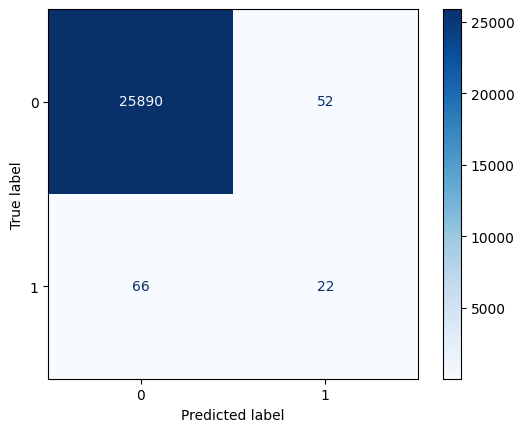

In [22]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

In [23]:
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Specificity: {specificity_score(y_test, y_pred)}")

print('----------------------------------------------------------------------')
print(f"True Positive Rate: {recall_score(y_test, y_pred)}")
print(f"False Positive Rate: {1-specificity_score(y_test, y_pred)}")
print("True Positive Rate GOAL: HIGH")
print("False Positive Rate GOAL: LOW")

Accuracy: 0.9954667691125624
Recall: 0.25
Specificity: 0.997995528486624
----------------------------------------------------------------------
True Positive Rate: 0.25
False Positive Rate: 0.002004471513376016
True Positive Rate GOAL: HIGH
False Positive Rate GOAL: LOW


In [24]:
## TRY THRESHOLD = 0.01
y_pred = (p_hat > 0.01).astype(int)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

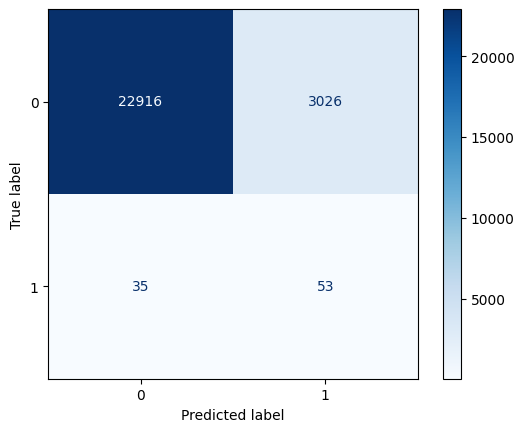

In [25]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

In [26]:
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Specificity: {specificity_score(y_test, y_pred)}")

print('----------------------------------------------------------------------')
print(f"True Positive Rate: {recall_score(y_test, y_pred)}")
print(f"False Positive Rate: {1-specificity_score(y_test, y_pred)}")
print("True Positive Rate GOAL: HIGH")
print("False Positive Rate GOAL: LOW")

Accuracy: 0.8824049174029965
Recall: 0.6022727272727273
Specificity: 0.8833551769331586
----------------------------------------------------------------------
True Positive Rate: 0.6022727272727273
False Positive Rate: 0.11664482306684143
True Positive Rate GOAL: HIGH
False Positive Rate GOAL: LOW


In [ ]:
## There is infinite number of possible cutoffs
## 0.01735
## How to select optimal cutoff?
## generate TPR and FPR for "ALL POSSIBLE" cutoffs (ROC Curve)

**ROC Curve**

In [29]:
## AUC (area under curve) we want it to be close to 1
## we need all possible thresholds, TPR, FPR

from sklearn.metrics import roc_curve, auc

## all thresholds, TPR and FPR
fpr, tpr, thresh= roc_curve(y_test, p_hat)

In [31]:
## Get AUC
## how well the model separates frauds from non-frauds using different thresholds
AUC_val = auc(fpr, tpr)
print("AUC:", AUC_val)

AUC: 0.7800434185350537


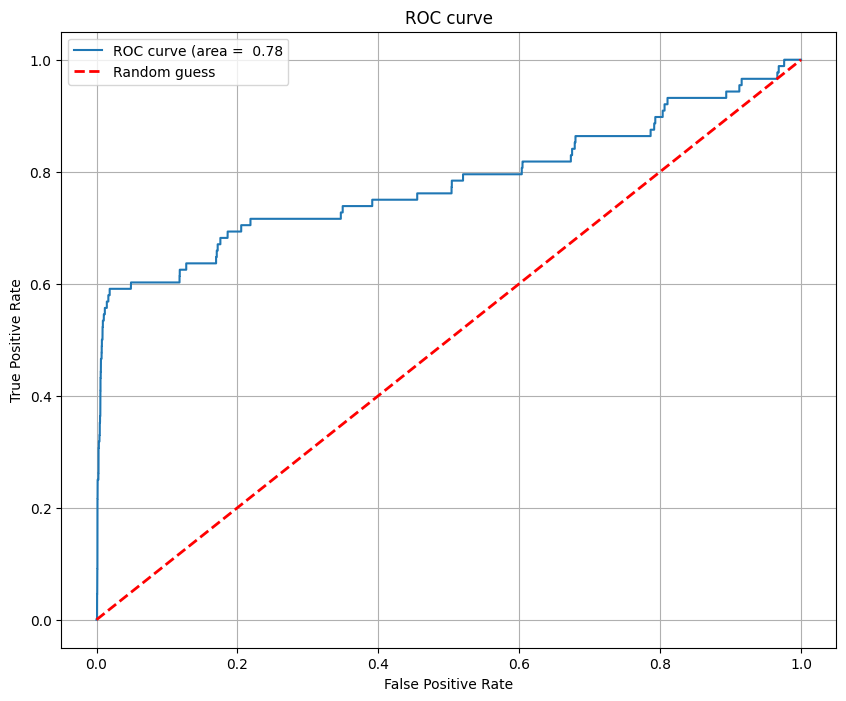

In [32]:
## Plot ROC Curve with AUC
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label= f'ROC curve (area = {AUC_val: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [35]:
## How to select the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresh[optimal_idx]
print("Optimal threshold:", optimal_threshold)

Optimal threshold: 0.01298277777191903


In [36]:
## check the performance with the optimal thresshold
y_pred = (p_hat > optimal_threshold).astype(int)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

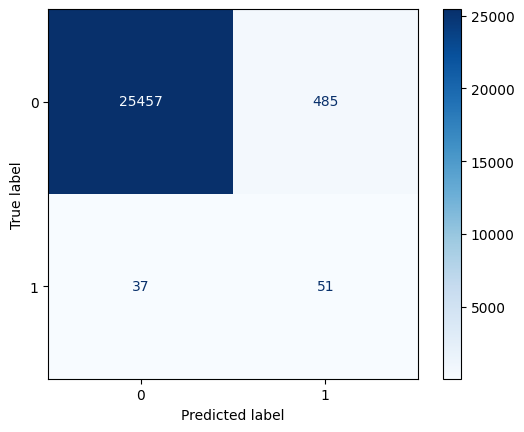

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap = "Blues");

In [38]:
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score
from imblearn.metrics import specificity_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Specificity: {specificity_score(y_test, y_pred)}")

print('----------------------------------------------------------------------')
print(f"True Positive Rate: {recall_score(y_test, y_pred)}")
print(f"False Positive Rate: {1-specificity_score(y_test, y_pred)}")
print("True Positive Rate GOAL: HIGH")
print("False Positive Rate GOAL: LOW")

Accuracy: 0.9799462159047253
Recall: 0.5795454545454546
Specificity: 0.9813044483848585
----------------------------------------------------------------------
True Positive Rate: 0.5795454545454546
False Positive Rate: 0.01869555161514147
True Positive Rate GOAL: HIGH
False Positive Rate GOAL: LOW


## **LIFT**

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/customer_churn.csv')
df.head()

,CustomerId,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15802351,Beers,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0
1,15591091,Goering,644,France,Male,44,5,73348.56,1,1,0,157166.79,1
2,15769582,Kang,586,France,Male,29,3,0.00,2,1,1,142238.54,0
3,15651823,Nkemjika,590,France,Female,60,6,147751.75,1,1,0,88206.04,1
4,15740175,Raynor,732,Germany,Female,42,2,118889.66,2,0,0,87422.15,0


In [40]:
## predict the customers with the highest prob to churn
## $300
## let's create a model
## get the propensities
## see the lift that we get if we send the offer to top 10% most likely to churn

In [42]:
## drop
df.drop(['CustomerId', 'Lastname'], axis = 1, inplace = True)

In [43]:
## get dummies
df = pd.get_dummies(df, drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_Germany,Geography_Spain,Gender_Male
0,755,33,6,90560.30,2,1,1,42607.69,0,True,False,False
1,644,44,5,73348.56,1,1,0,157166.79,1,False,False,True
2,586,29,3,0.00,2,1,1,142238.54,0,False,False,True
3,590,60,6,147751.75,1,1,0,88206.04,1,False,False,False
4,732,42,2,118889.66,2,0,0,87422.15,0,True,False,False


In [44]:
## Create X and y
X = df.drop('Churned', axis = 1)
y = df['Churned']

In [45]:
## Split 70% 30% seed = 13
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

In [46]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

## instance
lr = LogisticRegression(solver = "liblinear")

## fit
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [47]:
## PROPENSITY MODELING
## Test
X_test.shape

(2430, 11)

In [48]:
## overall proportion of 1s (base rate)
## 0.194239
y_test.value_counts() / len(y_test)

,count
Churned,
0,0.805761
1,0.194239


In [50]:
20*0.194239

3.88478

In [52]:
df_test = X_test.copy()
df_test['y_true'] = y_test
df_test['p_hat'] = lr.predict_proba(X_test)[:,1]
df_test.sort_values('p_hat', ascending = False, inplace = True)
df_test.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,y_true,p_hat
5765,491,70,6,148745.92,2,1,1,17818.33,True,False,True,0,0.785963
1161,498,73,2,170241.70,2,1,1,165407.96,False,False,True,0,0.769302
2687,428,62,1,107735.93,1,0,1,58381.77,False,False,False,0,0.737637
219,580,76,2,130334.84,2,1,1,51672.08,True,False,True,0,0.733444
4115,494,69,9,93320.80,1,1,1,24489.44,False,False,True,0,0.729482
1194,543,71,1,104308.77,1,1,1,25650.04,False,False,False,0,0.716278
4091,529,72,5,94216.05,1,1,1,78695.68,True,False,True,0,0.705140
1445,531,64,2,175754.87,2,1,1,60721.40,True,False,False,0,0.700721
5505,350,60,3,0.00,1,0,0,113796.15,False,False,False,1,0.690436
7551,502,64,3,139663.37,1,0,1,100995.11,False,False,False,0,0.683681


In [53]:
## lift
overall_prop = 0.194239
sample_prop = 5 / 20

lift = sample_prop / overall_prop
print("Lift:", lift)

Lift: 1.2870741715103557


In [55]:
## What if we selected 10% of the data
## What is the lift
len(y_test)*.1

243.0

In [58]:
sample_prop = df_test.head(243)['y_true'].sum() / 243
overall_prop = 0.194239

lift = sample_prop / overall_prop
print("Lift:", lift)

Lift: 2.05508139319349


In [59]:
## LIFT CURVE
!pip install kds
import kds

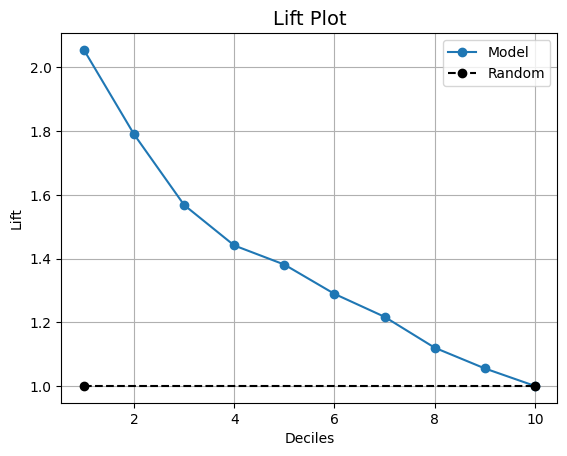

In [62]:
## LIFT CURVE
kds.metrics.plot_lift(y_test, lr.predict_proba(X_test)[:,1])